## Demo Scripts for the wfdb-python package

Run this script from the base directory of the git repository to access the included demo files

In [2]:
import wfdb
import numpy as np
from IPython.display import display

### Reading Records and Annotations

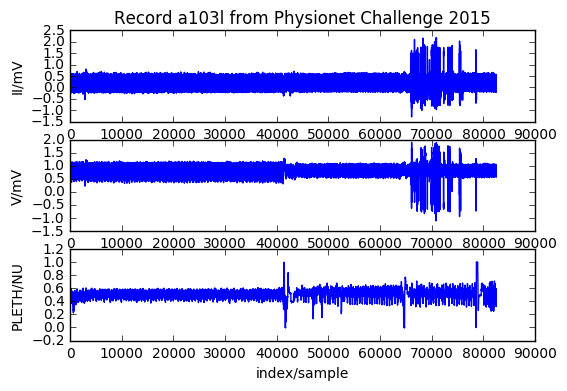

{'adcgain': [7247.0, 10520.0, 12530.0],
 'adcres': [16, 16, 16],
 'adczero': [0, 0, 0],
 'basecounter': None,
 'basedate': None,
 'baseline': [0, 0, 0],
 'basetime': None,
 'blocksize': [0, 0, 0],
 'byteoffset': [24, 24, 24],
 'checksum': [38133.0, 65235.0, 48145.0],
 'comments': ['Asystole', 'False alarm'],
 'counterfreq': None,
 'd_signals': None,
 'filename': ['a103l.mat', 'a103l.mat', 'a103l.mat'],
 'fmt': ['16', '16', '16'],
 'fs': 250.0,
 'initvalue': [-171.0, 9127.0, 6042.0],
 'nsig': 3,
 'p_signals': array([[-0.02359597,  0.86758555,  0.48220271],
        [-0.03698082,  0.98298479,  0.5443735 ],
        [-0.06292259,  0.85979087,  0.47821229],
        ..., 
        [-0.04084449,  0.7493346 ,  0.5150838 ],
        [-0.04719194,  0.7581749 ,  0.50957702],
        [-0.04677798,  0.7615019 ,  0.5028731 ]]),
 'recordname': 'a103l',
 'sampsperframe': [1, 1, 1],
 'siglen': 82500,
 'signame': ['II', 'V', 'PLETH'],
 'skew': [0, 0, 0],
 'units': ['mV', 'mV', 'NU']}

True

In [2]:
# Demo 1 - Read a wfdb record using the 'rdsamp' function into a wfdb.Record object.
# Plot the signals, and show the data
record = wfdb.rdsamp('sampledata/a103l') 
wfdb.plotrec(record, title='Record a103l from Physionet Challenge 2015') 
display(record.__dict__)


# Can also read the same files hosted on PhysioBank https://physionet.org/physiobank/database/
# in the challenge/2015/training/ database subdirectory. Full url = https://physionet.org/physiobank/database/challenge/2015/training/
record2 = wfdb.rdsamp('a103l', pbdir = 'challenge/2015/training/')

display(record.__eq__(record2))

In [3]:
# Demo 2 - Read certain channels and sections of the WFDB record using the simplified 'srdsamp' function
# which returns an array and a dictionary. Show the data
signals, fields=wfdb.srdsamp('sampledata/s0010_re', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000)
display(signals)
display(fields)

# Can also read the same files hosted on PhysioBank 
signals2, fields2=wfdb.srdsamp('s0010_re', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000, pbdir = 'ptbdb/patient001/')

print(np.array_equal(signals, signals2) and set(fields.keys())==set(fields2.keys()))

array([[ 0.0335, -0.167 , -0.237 ,  0.1165],
       [ 0.0355, -0.1615, -0.2395,  0.119 ],
       [ 0.0385, -0.168 , -0.2465,  0.116 ],
       ..., 
       [-0.0445,  0.008 ,  0.033 ,  0.045 ],
       [-0.044 ,  0.0175,  0.042 ,  0.052 ],
       [-0.044 ,  0.0245,  0.0365,  0.05  ]])

{'comments': [' age: 81',
  ' sex: female',
  ' ECG date: 01/10/1990',
  ' Diagnose:',
  ' Reason for admission: Myocardial infarction',
  ' Acute infarction (localization): infero-latera',
  ' Former infarction (localization): no',
  ' Additional diagnoses: Diabetes mellitu',
  ' Smoker: no',
  ' Number of coronary vessels involved: 1',
  ' Infarction date (acute): 29-Sep-90',
  ' Previous infarction (1) date: n/a',
  ' Previous infarction (2) date: n/a',
  ' Hemodynamics:',
  ' Catheterization date: 16-Oct-90',
  ' Ventriculography: Akinesia inferior wall',
  ' Chest X-ray: Heart size upper limit of norm',
  ' Peripheral blood Pressure (syst/diast):  140/80 mmHg',
  ' Pulmonary artery pressure (at rest) (syst/diast): n/a',
  ' Pulmonary artery pressure (at rest) (mean): n/a',
  ' Pulmonary capillary wedge pressure (at rest): n/a',
  ' Cardiac output (at rest): n/a',
  ' Cardiac index (at rest): n/a',
  ' Stroke volume index (at rest): n/a',
  ' Pulmonary artery pressure (laod) (syst/

True


In [2]:
# Demo 3 - Read part of a WFDB annotation file into a wfdb.Annotation object, and plot the samples
import wfdb
import numpy as np
from IPython.display import display

annotation = wfdb.rdann('sampledata/100', 'atr', sampfrom = 100000, sampto = 110000)
#annotation.fs = 360
#wfdb.plotann(annotation, timeunits = 'minutes')

# Can also read the same file hosted on PhysioBank 
annotation2 = wfdb.rdann('100', 'atr', sampfrom = 100000, sampto = 110000, pbdir = 'mitdb')

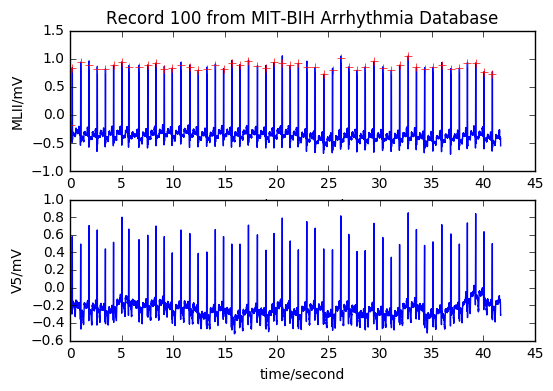

In [5]:
# Demo 4 - Read a WFDB record and annotation. Plot all channels, and the annotation on top of channel 0.

record = wfdb.rdsamp('sampledata/100', sampto = 15000)
annotation = wfdb.rdann('sampledata/100', 'atr', sampto = 15000)

wfdb.plotrec(record, annotation = annotation, title='Record 100 from MIT-BIH Arrhythmia Database', timeunits = 'seconds')


### Matched waveform examples

The following sections load and plots waveforms from the MIMIC matched waveform database. These waveforms have been matched to clinical data in the MIMIC Clinical database. The input records are multi-segment (made up of multiple individual WFDB records) and relatively long.

Note that these kinds of records contain segments in which certain channels are missing. <strong>matplotlib</strong> automatically zooms in on sections without Nans in individual channels but the entire durations of the signals input into <strong>plotrec</strong> are actually plotted. 



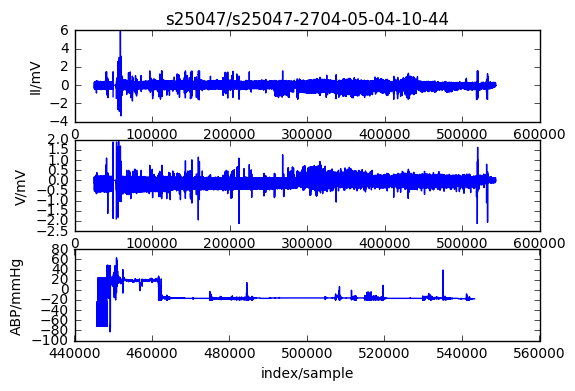

{'adcgain': None,
 'adcres': None,
 'adczero': None,
 'basecounter': None,
 'basedate': '04/05/2704',
 'baseline': None,
 'basetime': '10:44:18.529',
 'blocksize': None,
 'byteoffset': None,
 'checksum': None,
 'comments': [' <age>: ?? <sex>: ?'],
 'counterfreq': None,
 'd_signals': None,
 'filename': None,
 'fmt': None,
 'fs': 125.0,
 'initvalue': None,
 'layout': 'Variable',
 'nsig': 3,
 'p_signals': array([[         nan,          nan,          nan],
        [         nan,          nan,          nan],
        [         nan,          nan,          nan],
        ..., 
        [ -0.02469136,   0.        , -17.6       ],
        [  0.04938272,   0.03333333, -17.6       ],
        [  0.02469136,   0.        , -17.6       ]]),
 'recordname': 's25047-2704-05-04-10-44',
 'sampsperframe': None,
 'siglen': 543240,
 'signame': ['II', 'V', 'ABP'],
 'skew': None,
 'units': ['mV', 'mV', 'mmHg']}

3234460_0001.dat
57274
57274
3234460_0002.dat
8
8
3234460_0003.dat
1272
1272
3234460_0004.dat
1024
1024
3234460_0005.dat
8
8
3234460_0006.dat
3064
3064
3234460_0007.dat
8
8
3234460_0008.dat
1272
1272
3234460_0009.dat
8
8
3234460_0010.dat
1016
1016
3234460_0011.dat
8
8
3234460_0012.dat
33016
33016
3234460_0013.dat
256
256
3234460_0014.dat
256
256
3234460_0015.dat
97288
97288
3234460_0016.dat
644222
644222
3234460_0017.dat
10575
10575
3234460_0018.dat
281925
281925


(False, 3)

In [9]:
# Demo 5 - Read the multi-segment record and plot waveforms from the MIMIC matched waveform database. 
record=wfdb.rdsamp('sampledata/matched/s25047/s25047-2704-05-04-10-44')
wfdb.plotrec(record, title='Record s25047-2704-05-04-10-44') 
display(record.__dict__)

# Can also read the same files hosted on PhysioBank (takes long to download the many large files)
record2 = wfdb.rdsamp('s25047-2704-05-04-10-44', pbdir = 'mimic2wdb/matched/s25047')

readsegs:  [11]
segranges:  [[774194, 1774194]]
segsigs:  [[1, 0]]


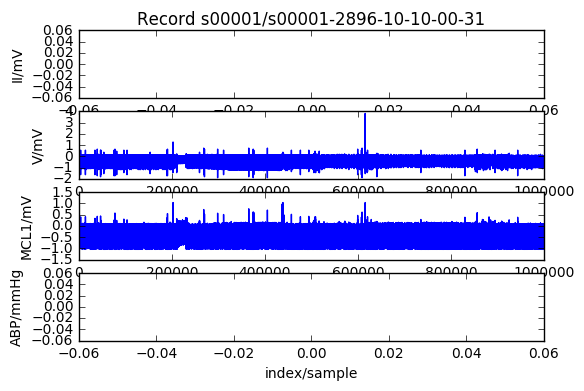

{'adcgain': None,
 'adcres': None,
 'adczero': None,
 'basecounter': None,
 'basedate': '10/10/2896',
 'baseline': None,
 'basetime': '00:31:25.894',
 'blocksize': None,
 'byteoffset': None,
 'checksum': None,
 'comments': [' <age>: 60 <sex>: F'],
 'counterfreq': None,
 'd_signals': None,
 'filename': None,
 'fmt': None,
 'fs': 125.0,
 'initvalue': None,
 'layout': 'Variable',
 'nsig': 4,
 'p_signals': array([[        nan,  0.        ,  0.1147541 ,         nan],
        [        nan,  0.        ,  0.1147541 ,         nan],
        [        nan,  0.        ,  0.12295082,         nan],
        ..., 
        [        nan,  0.        ,  0.03278689,         nan],
        [        nan,  0.        ,  0.01639344,         nan],
        [        nan,  0.        ,  0.        ,         nan]]),
 'recordname': 's00001-2896-10-10-00-31',
 'sampsperframe': None,
 'siglen': 1000000,
 'signame': ['II', 'V', 'MCL1', 'ABP'],
 'skew': None,
 'units': ['mV', 'mV', 'mV', 'mmHg']}

readsegs:  [11]
segranges:  [[774194, 1774194]]
segsigs:  [[1, 0]]
3975656_0009.dat
2000000
2000000


(False, 3)

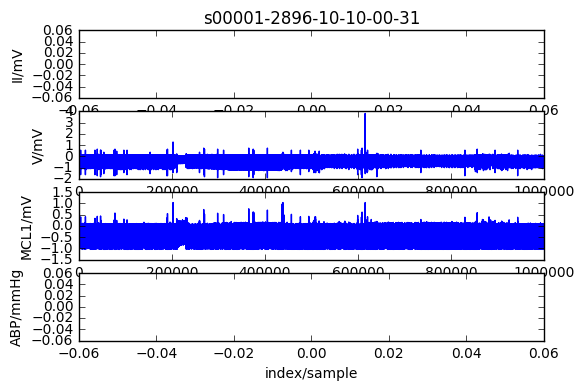

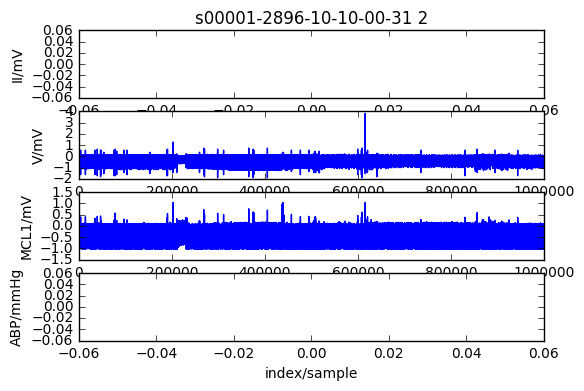

In [4]:
# Demo 6 - Read the multi-segment record and plot waveforms from the MIMIC matched waveform database.
# Notice that some channels have no valid values to plot

import wfdb
import numpy as np
from IPython.display import display
record = wfdb.rdsamp('sampledata/matched/s00001/s00001-2896-10-10-00-31', sampfrom = 3000000, sampto = 4000000)
wfdb.plotrec(record, title='Record s00001/s00001-2896-10-10-00-31') 
display(record.__dict__)

# Can also read the same files hosted on PhysioBank
record2 = wfdb.rdsamp('s00001-2896-10-10-00-31', sampfrom = 3000000, sampto = 4000000, pbdir = 'mimic2wdb/matched/s00001')

### Writing Records and Annotations